<a href="https://colab.research.google.com/github/alexalra/Portfolio-Alejandro/blob/main/1_EDA_with_Python_(Pandas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis with Python

## Project Intro

This project is used to showcase my Python expertise in my portfolio. I utilize different libraries to conduct exploratory data analysis (EDA) in an World Bank World Development Indicators dataset. The process involves:

1) Data inspection

2) Data cleaninng and manipulation

3) Numerical summarization and distribution

4) Relationship between variables

The dataset contains data about World Development Indicators measured from 1960 to 2023, extracted from the World Bank database. It includes macro-economical, social, political and environmental data from all the countries and regions the world bank has data about.

The dataset is courtesy of [Kaggle](https://www.kaggle.com/datasets/nicolasgonzalezmunoz/world-bank-world-development-indicators).

In [1]:
#Import the relevant libraries

import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Upload the csv file

from google.colab import files

uploaded = files.upload()

Saving world_bank_development_indicators.csv to world_bank_development_indicators.csv


In [3]:
#Transform CSV to df

df = pd.read_csv(io.BytesIO(uploaded['world_bank_development_indicators.csv']))




# 1. Data inspection

In [4]:
#Let's get a glimpse of the dataset

df.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


### 1.1 DF size and characteristics

In [5]:
#Let's see the size of the dataset

df.shape


(17272, 50)

In [6]:
#Let's see how many values are missing per column

missing_values = df.isna().sum()

print(missing_values.sort_values(ascending = False))

doing_business                               17083
time_to_get_operation_license                16901
multidimensional_poverty_headcount_ratio%    16817
human_capital_index                          16671
statistical_performance_indicators           16035
logistic_performance_index                   15865
central_goverment_debt%                      15192
gini_index                                   15164
risk_premium_on_lending                      14902
research_and_development_expenditure%        14383
intentional_homicides                        13063
real_interest_rate                           12856
goverment_effectiveness_std                  12513
goverment_effectiveness_estimate             12513
regulatory_quality_estimate                  12511
regulatory_quality_std                       12511
expense%                                     12503
control_of_corruption_std                    12489
control_of_corruption_estimate               12489
political_stability_estimate   

In [7]:
#Let's see the % of values missing per column

percentage_missing = (df.isna().sum() / len(df)) *100

print(percentage_missing.sort_values(ascending = False))

doing_business                               98.905743
time_to_get_operation_license                97.852015
multidimensional_poverty_headcount_ratio%    97.365679
human_capital_index                          96.520380
statistical_performance_indicators           92.838119
logistic_performance_index                   91.853868
central_goverment_debt%                      87.957388
gini_index                                   87.795276
risk_premium_on_lending                      86.278370
research_and_development_expenditure%        83.273506
intentional_homicides                        75.631079
real_interest_rate                           74.432608
goverment_effectiveness_std                  72.446735
goverment_effectiveness_estimate             72.446735
regulatory_quality_estimate                  72.435155
regulatory_quality_std                       72.435155
expense%                                     72.388837
control_of_corruption_std                    72.307781
control_of

The dataset is composed of 17272 rows and 50 columns.

There are a lot of missing values. Only a few columns have less than 20% of values missing (out of the total they have). We will use only those columns for our calculations.

In the next section, I will identify these columns and create a new dataframe that excludes all the columns missing more than 20% of the values.



















### 1.2 Data types

In [82]:
#Let's see the different data types of the DF

df.dtypes

,0
country,object
date,object
agricultural_land%,float64
forest_land%,float64
land_area,float64
avg_precipitation,float64
trade_in_services%,float64
control_of_corruption_estimate,float64
control_of_corruption_std,float64
access_to_electricity%,float64


It appears that all numerical values have been stored as float. However, there are multiple columns that contain discrete variables (measured in full numbers) that would benefit from being stored as an integer. For example, the column called "interntional_homicides", there is not such a thing as 1.5 homicides, so there's no reason for storing it as a float.

In the next section, I will change the data types of those columns with less than 20% of values missing if necessary.

# 2. Data cleaning and manipulation


### 2.1 Handling missing data

In [8]:
#Let's create a DF that includes only the columns missing less than 20% of the values.

filtered_columns = percentage_missing.reset_index()

filtered_columns.columns = ["Column_name", "Percentage_missing"]

final_filtered_columns = filtered_columns[(filtered_columns["Percentage_missing"] < 20)].sort_values(by = "Percentage_missing", ascending = True).reset_index(drop=True)

print(final_filtered_columns)


                Column_name  Percentage_missing
0                   country            0.000000
1                      date            0.000000
2                population            3.514358
3          rural_population            4.243863
4                birth_rate            7.150301
5                death_rate            7.254516
6  life_expectancy_at_birth            8.140343
7                 land_area           13.559518
8        population_density           13.727420
9        agricultural_land%           14.810097


In [9]:
#Let's extract a list with the name of the columns missing less than 20% of the values.

filtered_columns = percentage_missing.reset_index()

final_list = final_filtered_columns["Column_name"].tolist()

print(final_list)

['country', 'date', 'population', 'rural_population', 'birth_rate', 'death_rate', 'life_expectancy_at_birth', 'land_area', 'population_density', 'agricultural_land%']


In [10]:
#Now that we have a list with the names of all columns missing less than 20% of the values.
# I will create a new DF -deriving from the original one- that includes only these columns

project_df = df[['country', 'date', 'population', 'rural_population', 'birth_rate', 'death_rate', 'life_expectancy_at_birth', 'land_area', 'population_density', 'agricultural_land%']]

project_df.head()

,country,date,population,rural_population,birth_rate,death_rate,life_expectancy_at_birth,land_area,population_density,agricultural_land%
0,Afghanistan,1960-01-01,8622466.0,7898093.0,50.340,31.921,32.535,NaN,NaN,NaN
1,Afghanistan,1961-01-01,8790140.0,8026804.0,50.443,31.349,33.068,652230.0,13.477056,57.878356
2,Afghanistan,1962-01-01,8969047.0,8163985.0,50.570,30.845,33.547,652230.0,13.751356,57.955016
3,Afghanistan,1963-01-01,9157465.0,8308019.0,50.703,30.359,34.016,652230.0,14.040239,58.031676
4,Afghanistan,1964-01-01,9355514.0,8458694.0,50.831,29.867,34.494,652230.0,14.343888,58.116002


### 2.2 Handling wrong data types

In [11]:
#Let's review the data types of our new dataframe and whether any modification is needed

project_df.dtypes

,0
country,object
date,object
population,float64
rural_population,float64
birth_rate,float64
death_rate,float64
life_expectancy_at_birth,float64
land_area,float64
population_density,float64
agricultural_land%,float64


It appears that the "date" column has been stored as an object. It should instead be a date. All the other columns are float, and it makes sense given the nature of the variables they store.


In [ ]:
#Let's change "date" data type.

project_df["date"] = project_df["date"].astype("datetime64[ns]")

project_df.dtypes

It appears that all dates follow the same format "dd-mm-year", where day and month are "01" always as a wild-cards. Given that only the year is useful in our calculations, let's drop the day and month, and keep only the year.


In [ ]:
#Let's create a new column with only the year, and delete "date"

project_df["year"] = project_df["date"].dt.year

project_df.drop("date", axis = 1, inplace = True)



In [13]:
#Let's see the data we'll be working with

project_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   17272 non-null  object 
 1   population                16665 non-null  float64
 2   rural_population          16539 non-null  float64
 3   birth_rate                16037 non-null  float64
 4   death_rate                16019 non-null  float64
 5   life_expectancy_at_birth  15866 non-null  float64
 6   land_area                 14930 non-null  float64
 7   population_density        14901 non-null  float64
 8   agricultural_land%        14714 non-null  float64
 9   year                      17272 non-null  int32  
dtypes: float64(8), int32(1), object(1)
memory usage: 1.3+ MB


In summary, we are left with 10 columns of data from different countries concerning population, birth/death, and other demographics variables. While the original dataset contained data about social and political topics too, we were left with demographic data mostly after getting rid of columns with way too many missing values.

# 3. Numerical summarization (demographic data)


### 3.1 Life expectancy at birth in 2021


In this section, we will focus on analysing data from one of the columns of our DF, life expectancy at birth. To narrow down our research, we will look at the life expectancy at birth for one single year. The criteria used for choosing that single year will be the year with less missing values in life_expectancy_at_birth.

In [15]:
#Let's see which is the year missing less values for life expectancy at birth

project_df.groupby("year")["life_expectancy_at_birth"].apply(lambda x: x.isna().sum()).sort_values(ascending = True)

,life_expectancy_at_birth
year,
2021,9
1987,10
1989,10
1986,10
1988,10
...,...
2018,17
2019,17
2020,17


The year is 2021, missing only 9 values, so we will use this one for the remaining analysis.

In [16]:
#Let's see the 5 countries with the largest life expectancy at birth in 2021

project_df[project_df["year"] == 2021].sort_values("life_expectancy_at_birth", ascending= False).head(5)

,country,population,rural_population,birth_rate,death_rate,life_expectancy_at_birth,land_area,population_density,agricultural_land%,year
6746,"Hong Kong SAR, China",7413100.0,0.0,5.000,6.900,85.492683,1050.00,7060.095238,3.809524,2021
9593,"Macao SAR, China",686607.0,0.0,10.114,4.111,85.399000,33.00,20806.272727,NaN,2021
7834,Japan,125681593.0,10221684.0,6.600,11.700,84.445610,364500.00,344.805468,12.781893,2021
9209,Liechtenstein,39039.0,33390.0,9.600,6.900,84.402439,160.00,243.993750,32.312500,2021
15287,Switzerland,8704546.0,2263530.0,10.300,8.200,83.851220,39509.63,220.314541,37.949692,2021


In [17]:
#Let's see the 5 countries with the lowest life expectancy at birth in 2021

project_df[project_df["year"] == 2021].sort_values("life_expectancy_at_birth", ascending= True).head(5)

,country,population,rural_population,birth_rate,death_rate,life_expectancy_at_birth,land_area,population_density,agricultural_land%,year
2813,Chad,17179740.0,13094226.0,43.357,12.504,52.525,1259200.0,13.643377,39.976175,2021
11608,Nigeria,213401323.0,100840661.0,37.117,13.083,52.676,910770.0,234.308687,75.369193,2021
9017,Lesotho,2281454.0,1608881.0,26.107,14.186,53.062,30360.0,75.146706,80.138340,2021
2685,Central African Republic,5457154.0,3129787.0,42.680,11.393,53.895,622980.0,8.759758,7.881473,2021
14424,South Sudan,10748272.0,8543371.0,29.107,11.050,54.975,631930.0,17.008643,44.708591,2021


### 3.2 Main statistics for life expectancy at birth

In [18]:
#Let's provide a statistical summary of the life expectancy at birth for 2021

project_df[project_df["year"]==2021]["life_expectancy_at_birth"].describe()


,life_expectancy_at_birth
count,257.000000
mean,71.373502
std,7.459605
min,52.525000
25%,66.072000
50%,71.900000
75%,76.463000
max,85.492683


It appears that the mean for the life expectancy at birth for all the countries in 2021 is 71.37 with a standard deviation of 7.46, implying a moderate variation in life expectancy among the countries in the dataset.

There seems to be also pretty big outliers, especially concerning the minimum life expectancy, going as low as 52.53 years.

Thanks to the median (71.90), now we know that 50% of the countries have a life expectancy at birth above this value, and 50% have a value below it.

The median (71.90) is almost the same value as  the mean (71.37). Therefore, in this case, the data is likely symmetrically distributed.

Let's visualise the mean, its spread, and the median to understand whether we are right.

### 3.3 Data visualization

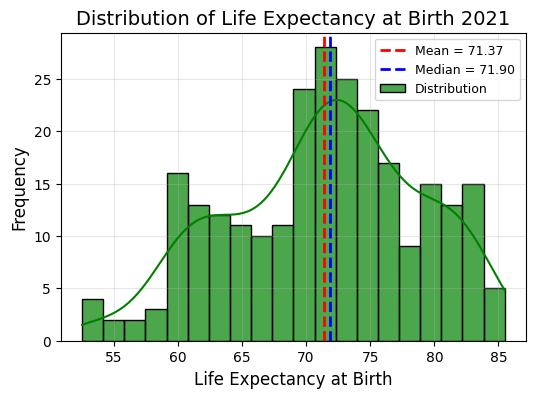

In [19]:
plot_df = project_df[project_df["year"] == 2021]["life_expectancy_at_birth"]

# Let's first plot histogram with the mean

plt.figure(figsize=(6, 4))
sns.histplot(plot_df, kde=True, bins=20, color="green", alpha=0.7, label="Distribution")

# Let's add the mean line
mean_value = plot_df.mean()
plt.axvline(mean_value, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_value:.2f}")

# Let's add the median line
median_value = plot_df.median()
plt.axvline(median_value, color="blue", linestyle="--", linewidth=2, label=f"Median = {median_value:.2f}")

# Let's customize the plot
plt.title("Distribution of Life Expectancy at Birth 2021", fontsize=14)
plt.xlabel("Life Expectancy at Birth", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()


The distribution shows a concentration of values around both the mean and median, indicating a fairly symmetrical pattern. However, there is a noticeable clustering of values at the lower end around 60 years old, as well as at the higher end between 80 and 85 years old.


### 3.4 Comparing 2 categorical variables (2 countries)

We have summarised statistical results for life expectancy at birth in 2021 for all countries in the dataset.

Hong Kong and Macao were the countries with the largest life expectancy at birth during 2021. Let's compare how the life expectancy at birth has evolved for these 2 countries accross time.

In [58]:
#Let's create 1 DF with life expectancy and year only for Spain and Japan

life_expectancy_HK_Macao = project_df.loc[project_df["country"].isin(["Hong Kong SAR, China", "Macao SAR, China"]), ["country", "life_expectancy_at_birth", "year"]]

#Let's see if we have any missing values

print(life_expectancy_HK_Macao[life_expectancy_HK_Macao.isna().any(axis= 1)])

                   country  life_expectancy_at_birth  year
6747  Hong Kong SAR, China                       NaN  2022
6748  Hong Kong SAR, China                       NaN  2023
9594      Macao SAR, China                       NaN  2022
9595      Macao SAR, China                       NaN  2023


In [59]:
#Both of them are missing the life expectancy for 2022 and 2023. Let's drop these.

life_expectancy_HK_Macao.dropna(inplace = True)

life_expectancy_HK_Macao.isna().sum()

,0
country,0
life_expectancy_at_birth,0
year,0


In [60]:
#Let's see both countries average and median life expectancy at birth.

print(life_expectancy_HK_Macao.groupby("country")["life_expectancy_at_birth"].mean())
print(life_expectancy_HK_Macao.groupby("country")["life_expectancy_at_birth"].median())


country
Hong Kong SAR, China    77.263212
Macao SAR, China        76.711516
Name: life_expectancy_at_birth, dtype: float64
country
Hong Kong SAR, China    77.529268
Macao SAR, China        77.664000
Name: life_expectancy_at_birth, dtype: float64


In [40]:
#Let's see some more descriptive statistics for HK.

life_expectancy_HK_Macao[life_expectancy_HK_Macao["country"]== "Hong Kong SAR, China"]["life_expectancy_at_birth"].describe()

,life_expectancy_at_birth
count,62.000000
mean,77.263212
std,5.578604
min,65.866293
25%,72.944512
50%,77.529268
75%,82.202439
max,85.497561


In [39]:
#Let's see some more descriptive statistics for Macao.

life_expectancy_HK_Macao[life_expectancy_HK_Macao["country"]== "Macao SAR, China"]["life_expectancy_at_birth"].describe()

,life_expectancy_at_birth
count,62.000000
mean,76.711516
std,6.211645
min,64.965000
25%,71.526750
50%,77.664000
75%,82.201000
max,85.399000




*   HK has an average life expectancy at birth of 77.26 years with a slight standard deviation of 5.58. The mean is almost the same as the median (77.52)
*   Macao has very similar results with a mean of 76.71 years of life expectancy and a standard deviation of 6.21. The mean is very close to the median (77.66).

Such results could suggest a symmetric distributions of both variables. To be sure, let's visualise the results for an easier comparison.


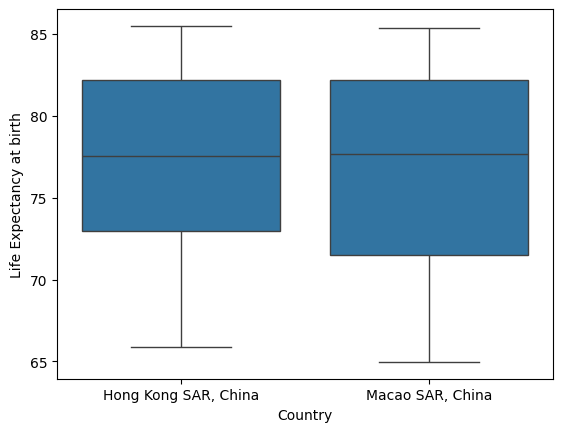

In [46]:
#Let's visualise the results

#Boxplot

sns.boxplot(x = "country", y = "life_expectancy_at_birth", data = life_expectancy_HK_Macao)

plt.xlabel("Country")
plt.ylabel("Life Expectancy at birth")

plt.show()
plt.close()

Thanks to this visualisation, we can see how due to the larger standard deviation of Macao, it's spread is larger than HK, which has a higher concentration of values around its mean.

Let's use histograms instead to better understand the spread and the presence of any outliers or central values.

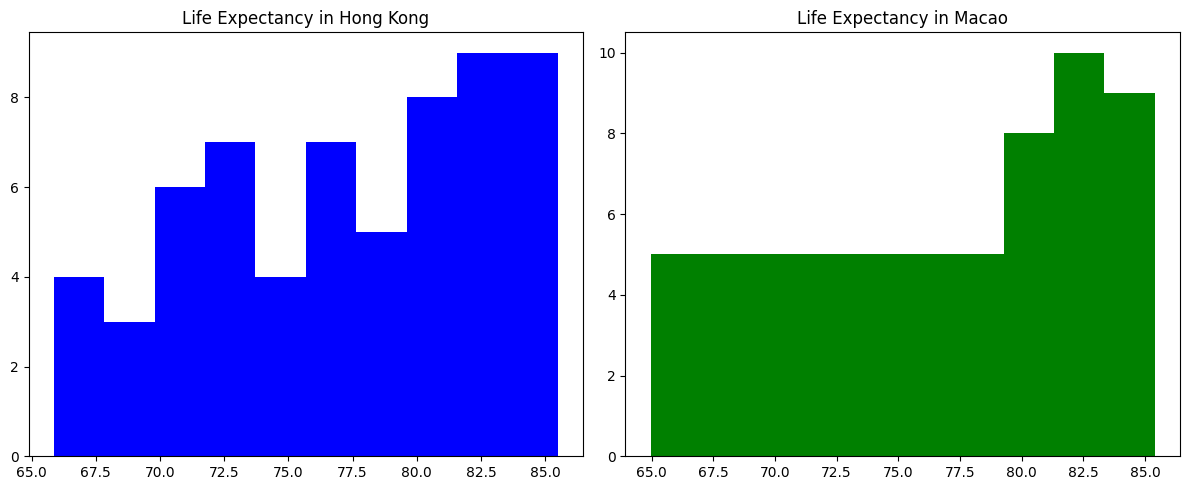

In [70]:
#Let's visualise 2 histograms, one per country.

plt.figure(figsize=(12, 5))

# Histogram for HK
plt.subplot(1,2,1)
plt.hist(data=life_expectancy_HK_Macao[life_expectancy_HK_Macao["country"]== "Hong Kong SAR, China"],
             x="life_expectancy_at_birth",
             color="blue")
plt.title("Life Expectancy in Hong Kong")


# Histogram for Macao
plt.subplot(1,2,2)

plt.hist(data=life_expectancy_HK_Macao[life_expectancy_HK_Macao["country"]== "Macao SAR, China"],
             x="life_expectancy_at_birth",
             color="green")
plt.title("Life Expectancy in Macao")

plt.tight_layout()
plt.show()


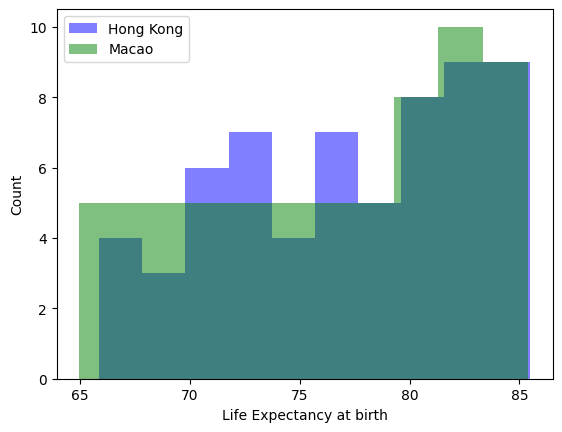

In [68]:
#Let's plot an overlapping histogram with both HK and Macao's life expectancy at birth to compare their distributions.

plt.hist(life_expectancy_HK_Macao[life_expectancy_HK_Macao["country"]== "Hong Kong SAR, China"]["life_expectancy_at_birth"], color="blue", label="Hong Kong", alpha=0.5)
plt.hist(life_expectancy_HK_Macao[life_expectancy_HK_Macao["country"]== "Macao SAR, China"]["life_expectancy_at_birth"], color="green", label="Macao", density=False, alpha=0.5)
plt.legend()
plt.xlabel("Life Expectancy at birth")
plt.ylabel("Count")
plt.show()



*   As previously seen, Macao's spread is slightly wider, suggesting a greater variation in life expectancy, while HK's range is narrower.
*   Both plots appear to be right-skewed, with a larger concentration between 80 and 85 years. The fact that the median and mean were very close suggested that the distribution could be central, but as seen, there are some extreme values that pull the tail outwards.


# 4. Relationship between variables


### 4.1 Selecting the variables for the correlation

We would like to look at the correlation between 1) life expectancy at birth and 2) the percentage of rural population.

For example: Is life expectancy longer if the rural population is smaller?

This presents 2 challenges that have to be overcome before calculating the correlation.

a) We need to select countries with the least amount of values missing. Ideally, we should continue with HK and Macao, but let's see how many values they are missing.

b) We need to calculate the % of rural population, which is not available by default. It would be "rural_population"/"population".

In [50]:
#Let's see the amount of missing values for "population" and "rural_population" for HK and Macao

#Both variables will be used to calculate the % of rural population

filtered_df = project_df[project_df["country"].isin(["Hong Kong SAR, China", "Macao SAR, China"])]

filtered_df.groupby("country")[["population", "rural_population", "life_expectancy_at_birth"]].apply(lambda x: x.isna().sum())


,population,rural_population,life_expectancy_at_birth
country,,,
"Hong Kong SAR, China",1,1,2
"Macao SAR, China",1,1,2


Both HK and Macao are barely missing any values, so we'll continue our analysis with them.


In [ ]:
#Let's add a new column with to calculate the % of rural population

project_df["%_rural_population"] = (project_df["rural_population"]/project_df["population"])*100

### 4.2 Calculating and visualising the correlation

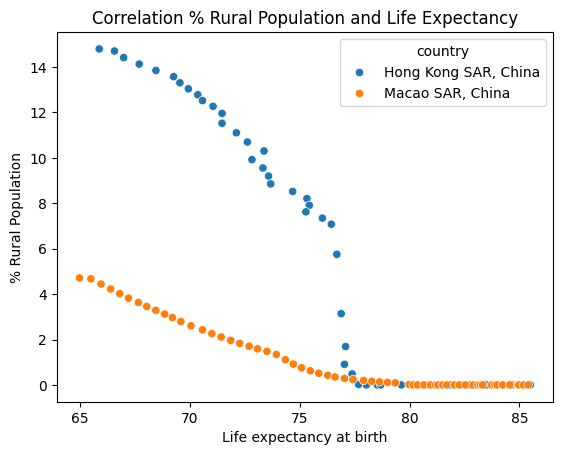

In [52]:
#Let's look at the correlation of life expectancy at birth with % of rural population

# Create the scatter plot
sns.scatterplot(x="life_expectancy_at_birth", y="%_rural_population", hue="country", data=filtered_df)

# Add a title and labels
plt.title('Correlation % Rural Population and Life Expectancy')
plt.xlabel('Life expectancy at birth')
plt.ylabel('% Rural Population')

# Show the plot
plt.show()


In the visulisation, it appears that life expectancy increases as the % of rural population decreases. The curve is more accentuated for HK, whose rural population moved between +14% and 0% during the studied timeframe. Such fluctuation was less felt for Macao. Nonetheless, both countries show a trend of longer life expectancy as the rural population decreases.

Despite these results, correlation cannot be interpret as causation. The increase in life expectancy could be caused by the advancement of medicine in the late 20th century, and be totally disconnected from the % of rural population.


To be certain about the correlation between both variables, let's calculate the correlation coefficient.

In [57]:
# Correlation coefficient

correlation_HK = filtered_df[filtered_df["country"] == "Hong Kong SAR, China"]["life_expectancy_at_birth"].corr(filtered_df[filtered_df["country"] == "Hong Kong SAR, China"]["%_rural_population"])

correlation_Macao = filtered_df[filtered_df["country"] == "Macao SAR, China"]["life_expectancy_at_birth"].corr(filtered_df[filtered_df["country"] == "Macao SAR, China"]["%_rural_population"])


print("HK's correlation coeffient is" + str(correlation_HK))

print("Macao's correlation coeffient is" + str(correlation_Macao))


HK's correlation coeffient is-0.9371132477289623
Macao's correlation coeffient is-0.9372062777743361


The coefficient returned for both countries is -0.94, which can be interpreted as very strong negative linear relationship between the 2 studied variables. As said, as the rural population decreases life expectancy increases.




This is the end of the Exploratory Data Analysis. Thanks to it, we cleaned and manipulated data to make it easier for the subsequent data analysis. We summarised some of the results statistically, visualised them and looked for correlations.